importing Jupyter notebook from check_ln2.ipynb
Log normal using MOM: KstestResult(statistic=0.06245711373686169, pvalue=0.8863649628170565)
Log normal using MLE: KstestResult(statistic=0.09197470995951273, pvalue=0.4643456841392215)


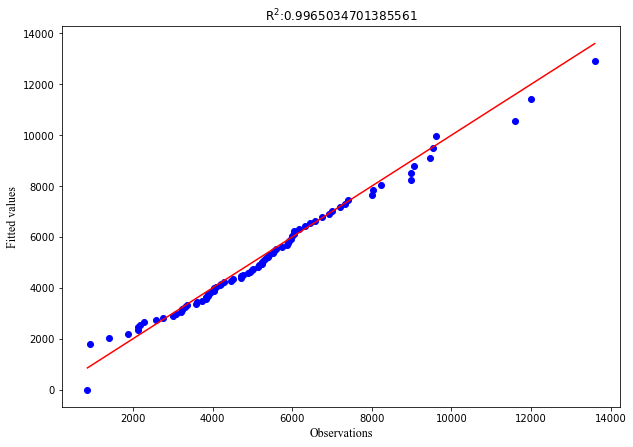

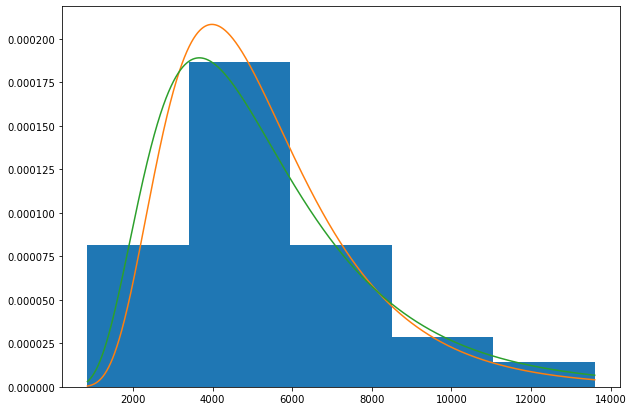

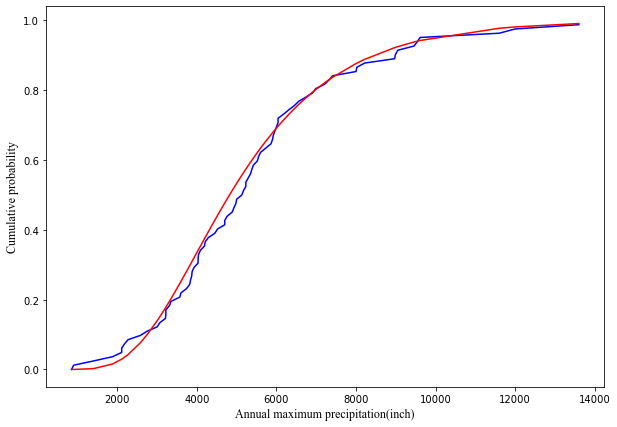

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats as ss
import scipy.signal
from astropy.stats import bootstrap as bootstrap
from statsmodels.tsa.ar_model import AutoReg
import math
import import_ipynb

import common_func as cf
from check_ln2 import fit_dist as fit_dist

In [14]:
# QQ function adjusted for subplots:

def qq_plot(maxQ, station=1, ax=None, **kwargs): ###Added ax,**kwargs
    para_mom = fit_dist(maxQ, 'MOM')
    maxQ_sorted = sorted(maxQ)
    x = 1/len(maxQ)
    ppf = [x *i for i in range(len(maxQ))]
    m = ss.lognorm.cdf(maxQ_sorted, s= para_mom[0], scale = para_mom[2])
    rho = np.corrcoef(ppf, m)[0, 1]
    maxQ_ppf = ss.lognorm.ppf(ppf, s= para_mom[0], scale = para_mom[2])
    
    #Create Subplots:
    ax=ax
    hfont = {'fontname':'Times New Roman'}
    ax.scatter(maxQ_sorted,maxQ_ppf, color='b')
    ax.plot(maxQ_sorted, maxQ_sorted, color='r') #, label='R$^2$:' + str(round(rho,4)))#str((round(rho,4)))
    ax.text(0.6,0.2,'R$^2$ :'+str(round(rho,4)), transform=ax.transAxes, fontsize='large',**hfont)
    ax.set_title('Station '+ str(station),fontsize='x-large',**hfont)
    




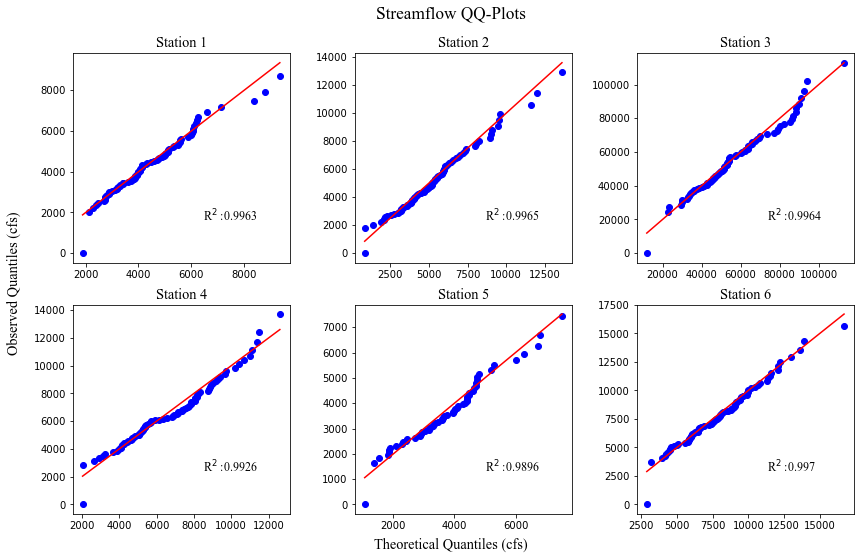

In [15]:
# QQ Subplots for Streamflow data
Stations = ['station_03117000.csv','station_04189000.csv','station_04193500.csv','station_04195500.csv','station_04196800.csv','station_04208000.csv']

n=math.ceil(len(Stations)/3)
fig, axs = plt.subplots(n,3, figsize=(14,8))#, sharex=True, sharey=True)
hfont = {'fontname':'Times New Roman'}
fig.suptitle('Streamflow QQ-Plots', fontsize='xx-large',**hfont)


for s in range(len(Stations)):
    data = pd.read_csv(Stations[s])
    maxQ, yearMaxQ = cf.annual_max(data)
    qq_plot(maxQ, s+1, axs[math.floor(s/3),s%3])

fig.text(0.5, 0.04, 'Theoretical Quantiles (cfs)', ha='center',fontsize='x-large',**hfont)
fig.text(0.06, 0.5, 'Observed Quantiles (cfs)', va='center', rotation='vertical',fontsize='x-large',**hfont)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)
plt.savefig('QQ_subplot_streamflow.png')




In [ ]:
###Tf vs delT Subplots (to be used in Vogel.p)


import math
###Subplots
# Stations = ['precip.csv','station_04189000.csv','station_04193500.csv','station_04195500.csv','station_04196800.csv','station_04208000.csv']
Stations = ['station_03117000.csv','station_04189000.csv','station_04193500.csv','station_04195500.csv','station_04196800.csv','station_04208000.csv']

n=math.ceil(len(Stations)/3)
fig, axs = plt.subplots(n,3, figsize=(14,8))#, sharex=True, sharey=True)
hfont = {'fontname':'Times New Roman'}
fig.suptitle('Return Period Reduction', fontsize='xx-large',**hfont)


for s in range(len(Stations)):
    data = pd.read_csv(Stations[s])
    maxP, years = cf.annual_max(data)
    lnmaxP = np.log(maxP)
    ybar,std, skew = cf.findmoments(lnmaxP)
    m, beta = fit_exp(maxP, years, 100)
    delta_t = np.arange(0,21,1)
    return_periods = [100, 200, 500, 1000]
    results = pd.DataFrame()
    for rp in return_periods: 
        results.loc[:, f"{rp}-Year Flood"] = vogel_results(beta, delta_t, rp,std)[1]
    results.columns
    

    ax = axs[math.floor(s/3),s%3]
    ax.plot(delta_t,results.iloc[:,:], label = results.columns)
    ax.legend()
    hfont = {'fontname':'Times New Roman'}
    ax.set_title('Station '+ str(s+1),fontsize='x-large',**hfont)
    
  
fig.text(0.5, 0.04, r'$\Delta$'+'T', ha='center',fontsize='x-large',**hfont)
fig.text(0.06, 0.5, 'Return Period', va='center', rotation='vertical',fontsize='x-large',**hfont)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)
plt.savefig('Tf_delT.png')